Unsupervised Learning and Preprocessing
---------

Unsupervised Learning?
- 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝

### 3.1 Types of unsupervised learning

#### unsupervised transformation
- 비지도 변환
- 데이터를 새롭게 표현하거나 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소이다.
  - dimensionality reduction
- 많은 텍스트 문서에서 주제를 추출하는 것이 예시

#### clustering
- 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2 Challenges in unsupervised learning

비지도 학습에서 가장 어려운 건 알고리즘이 뭔가 유용한 것을 학습했는지 **평가**하는 것
- 레이블이 없는 데이터에 적용해야 하기 때문, 무엇이 올바른 출력인가?
- 별다른 방법 없이 직접 확인하는 것이 유일한 방법일 때가 많다.

그래서 비지도 학습의 경우 데이터를 더 잘 이해하고 싶을 때 EDA 단계에서 많이 사용
- 지도 학습의 전처리 단계에서도 사용, 비지도 학습의 결과로 새롭게 표현된 데이터를 사용하면 지도 학습의 정확도가 좋아지기도 함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 3.3 데이터 전처리와 스케일 조정

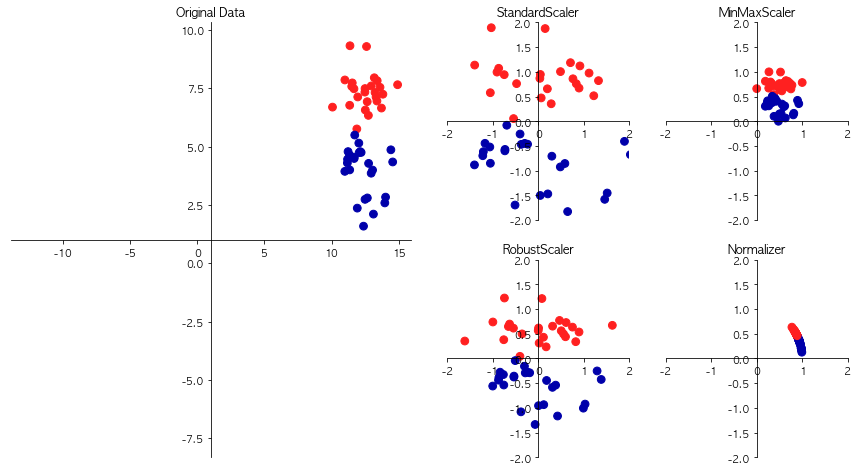

In [2]:
mglearn.plots.plot_scaling()

#### 3.3.1 여러 가지 전처리 방법

- sklearn official example : https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler


**StandardScaler**
- 각 feature의 평균을 0, 분산을 1로 변경하여 모든 feature가 같은 크기를 가지게 함
- z score를 생각하자, 표준점수!!
- feature의 최솟값과 최댓값 크기를 제한하지는 않음

**RobustScaler**
- feature들이 같은 scale을 갖게 된다는 통계적 측면에서 StandardScaler와 비슷
- 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용
- 이런 방식 덕분에 전체 데이터와 아주 동떨어진 값에 영향을 받지 않음(outlier에 영향을 받지 않음)

**MinMaxScaler**
- 모든 feature가 정확하게 0과 1 사이에 위치하도록 데이터를 변경
- 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y 축의 0과 1 사이의 사각 영역에 담기게 됨

**Normalizer**
- 매우 다른 스케일링 방법
- 특성 벡터의 유클리디안 길이가 1이 되도록 데이터를 조정
- 바꿔 말하면 지름이 1인 원(3차원의 경우 구)에 각 데이터 포인트를 투영
  - 데이터 포인트가 다른 비율로 스케일이 조정
  - 데이터의 방향 또는 각도가 중요할 때 많이 사용

#### 3.3.2 데이터 변환 적용하기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# 데이터 변환
# sklearn의 transform은 새로운 데이터를 표현(representation)을 만들 때 사용하는 방법

X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 데이터셋의 속성을 출력합니다

print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 3.3.3 QuantileTransformer & PowerTransformer

**QuantileTransformer**
- 1000개의 quantile를 사용하여 데이터를 균등하게 분포
- 이상치에 민감하지 않으며, 전체 데이터를 0과 1사이로 압축

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

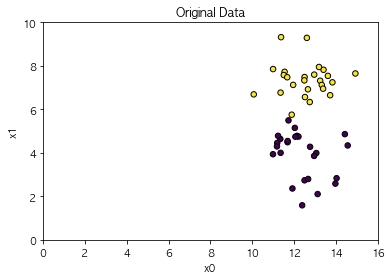

In [9]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

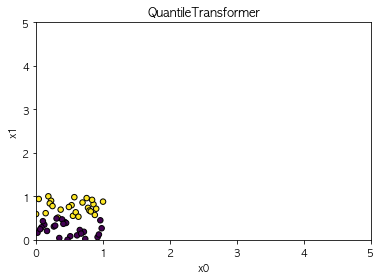

In [10]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

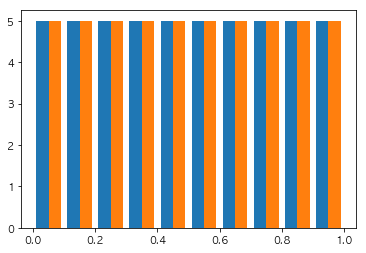

In [11]:
plt.hist(X_trans)
plt.show()

In [12]:
# n_quantiles parameter의 default 값은 1000

print(scaler.quantiles_.shape)

(1000, 2)


**example code**

In [13]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]
[9.99999998e-08 2.50083417e-01 5.00250250e-01 7.50000000e-01
 9.99999900e-01]


QuantileTransformer는 output_distribution parameter에서 normal로 지정하여 균등 분포가 아니라, 정규분포로 출력을 바꿀 수 있다.

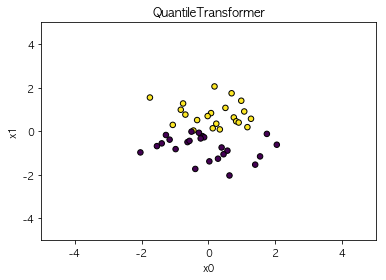

In [14]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

**PowerTransformer**

데이터의 feature 별로 정규분포 형태에 가깝게 변환해주는 역할
- default : yeo-johnson
- box-cox도 가능

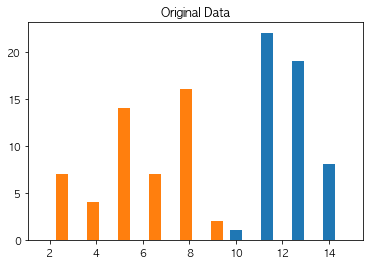

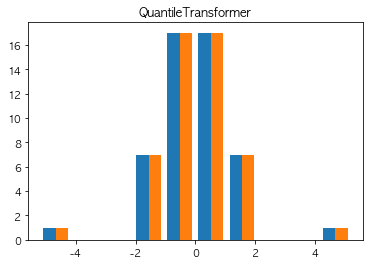

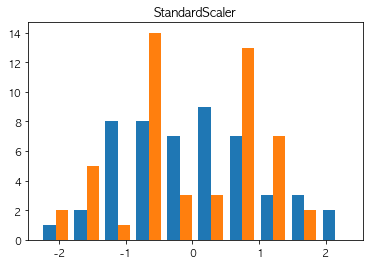

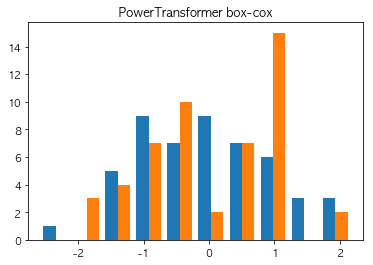

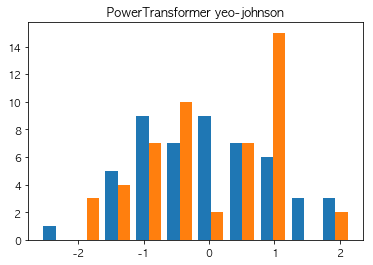

In [15]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

#### 3.3.4 Scaling training and test data the same way

- 지도 학습에서는 train set과 test set의 스케일링을 같이 해주었다.
- 하지만 테스트 세트의 최솟값과 범위를 사용 했을 떄 어떤 일이 일어나는지 살펴보자.

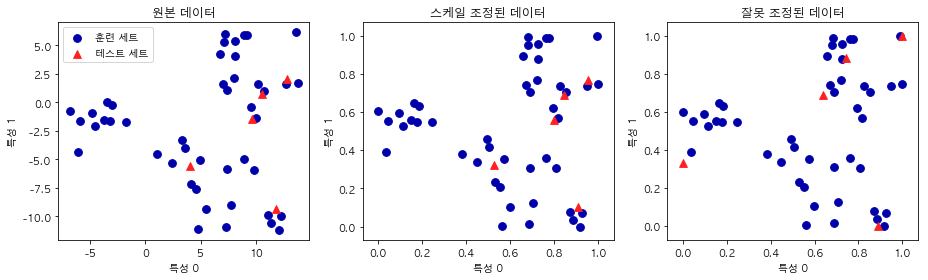

In [16]:
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

- 세 번쨰 그래프를 보면, 서로 다른 방식으로 조정했을 때 발생할 수 있는 문제를 보여줌
- 모두 최솟값과, 최댓값이 0과 1
- 다른 비율로 이동이 일어남

### Tips

- 보통 어떤 데이터셋에 fit을 적용하면 transform을 호출
- 매우 전형적인 방법이라 효율적인 방법이 필요함
- 이럴 경우를 위해 transform을 가진 모든 모델은 fit_transform 메서드를 제공
- 코드도 더 깔끔해서 좋은 것 같다.
- 주의 할 것은 test set에서 fit_transform()을 적용하면 train set에서 학습한 내용이 모두 지워짐
  - test_set에서는 반드시 transform()을 사용해야 함

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

#### 3.3.5 지도 학습에서 데이터 전처리 효과

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,random_state=0
)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
# preprocessing using 0-1 scaling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# preprocessing using zero mean and unit variance scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


### 3.4 Dimensionality Reduction(차원 축소), Feature Extraction(특성 추출) and Manifold Learning(매니폴드 학습)

- 비지도 학습을 사용해서 데이터를 변환하는 이유
  - 시각화
  - 데이터 압축
  - 추가적인 처리
  - 정보를 더 얻기 위해.

#### 3.4.1 Principal component analysis, PCA(주성분 분석)

PCA는 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전 시키는 기술
- Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models.
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택

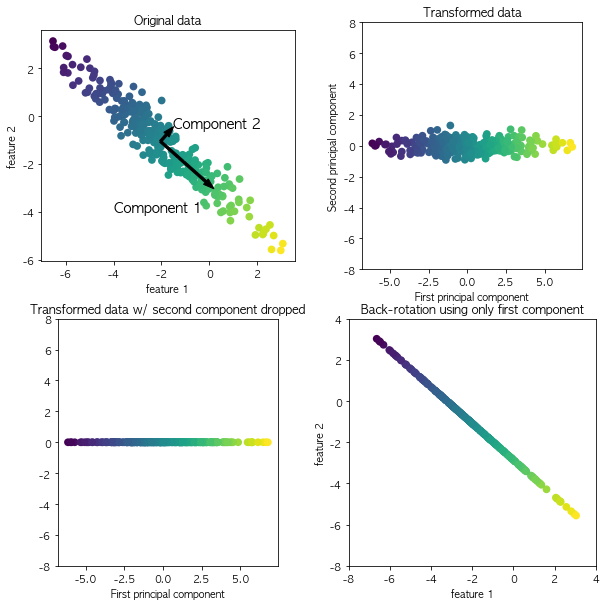

In [21]:
mglearn.plots.plot_pca_illustration()

그래프 해석

- 첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시
  - component 1 이라고 쓰여 있는, 분산이 가장 큰 방향을 찾음
  - 이 방향(벡터)가 데이터에서 가장 많은 정보를 담고 있는 방향
  - 특성들의 상관관계가 가장 큰 방향
  - 그 후 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾음
  - 2차원에서 표현되는 직각일 뿐 어느 방향으로 표시 될 수 있다.
  - 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분(principal component)라고 한다.
  - 일반적으로 원본 feature 개수만큼의 주성분이 존재

- 두 번쨰 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축, y축에 나란하도록 회전
  - 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞춤
  - PCA에 의해 회전한 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됨

PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용 가능

- 세 번쨰 그래프
  - 첫 번쨰 주성분만 유지
  - 차원 감소
  - 가장 유용한 방향을 찾아서 그 방향의 성분을 유지 하려고 함
  
- 네 번쨰 그래프
  - 데이터에 다시 평균을 더하고 반대로 회전
  - 이런 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는데 종종 사용

#### PCA를 적용해 유방암 데이터셋 시각화하기

- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
- feature가 30개나 있는 유방암 데이터셋을 어떻게 표현해야 할까...?
- 아래 그림에 대한 설명
  - 각 feature에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터가 나타나는지 횟수를 센 것
  - 악성과 양성 그래프를 겹쳐 놓고, 어떤 feature가 악성과 양성을 구분하는 데 더 좋은지 가늠해볼 수 있다.
  - 거의 겹치는 건 쓸모가 없지만, 확연히 구분되는 건 매우 유용하다.
- 그러나 이 그래프는 feature 간의 상호작용이나, 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다.
  - PCA를 사용하면, 주요 상호작용을 찾아낼 수 있다.

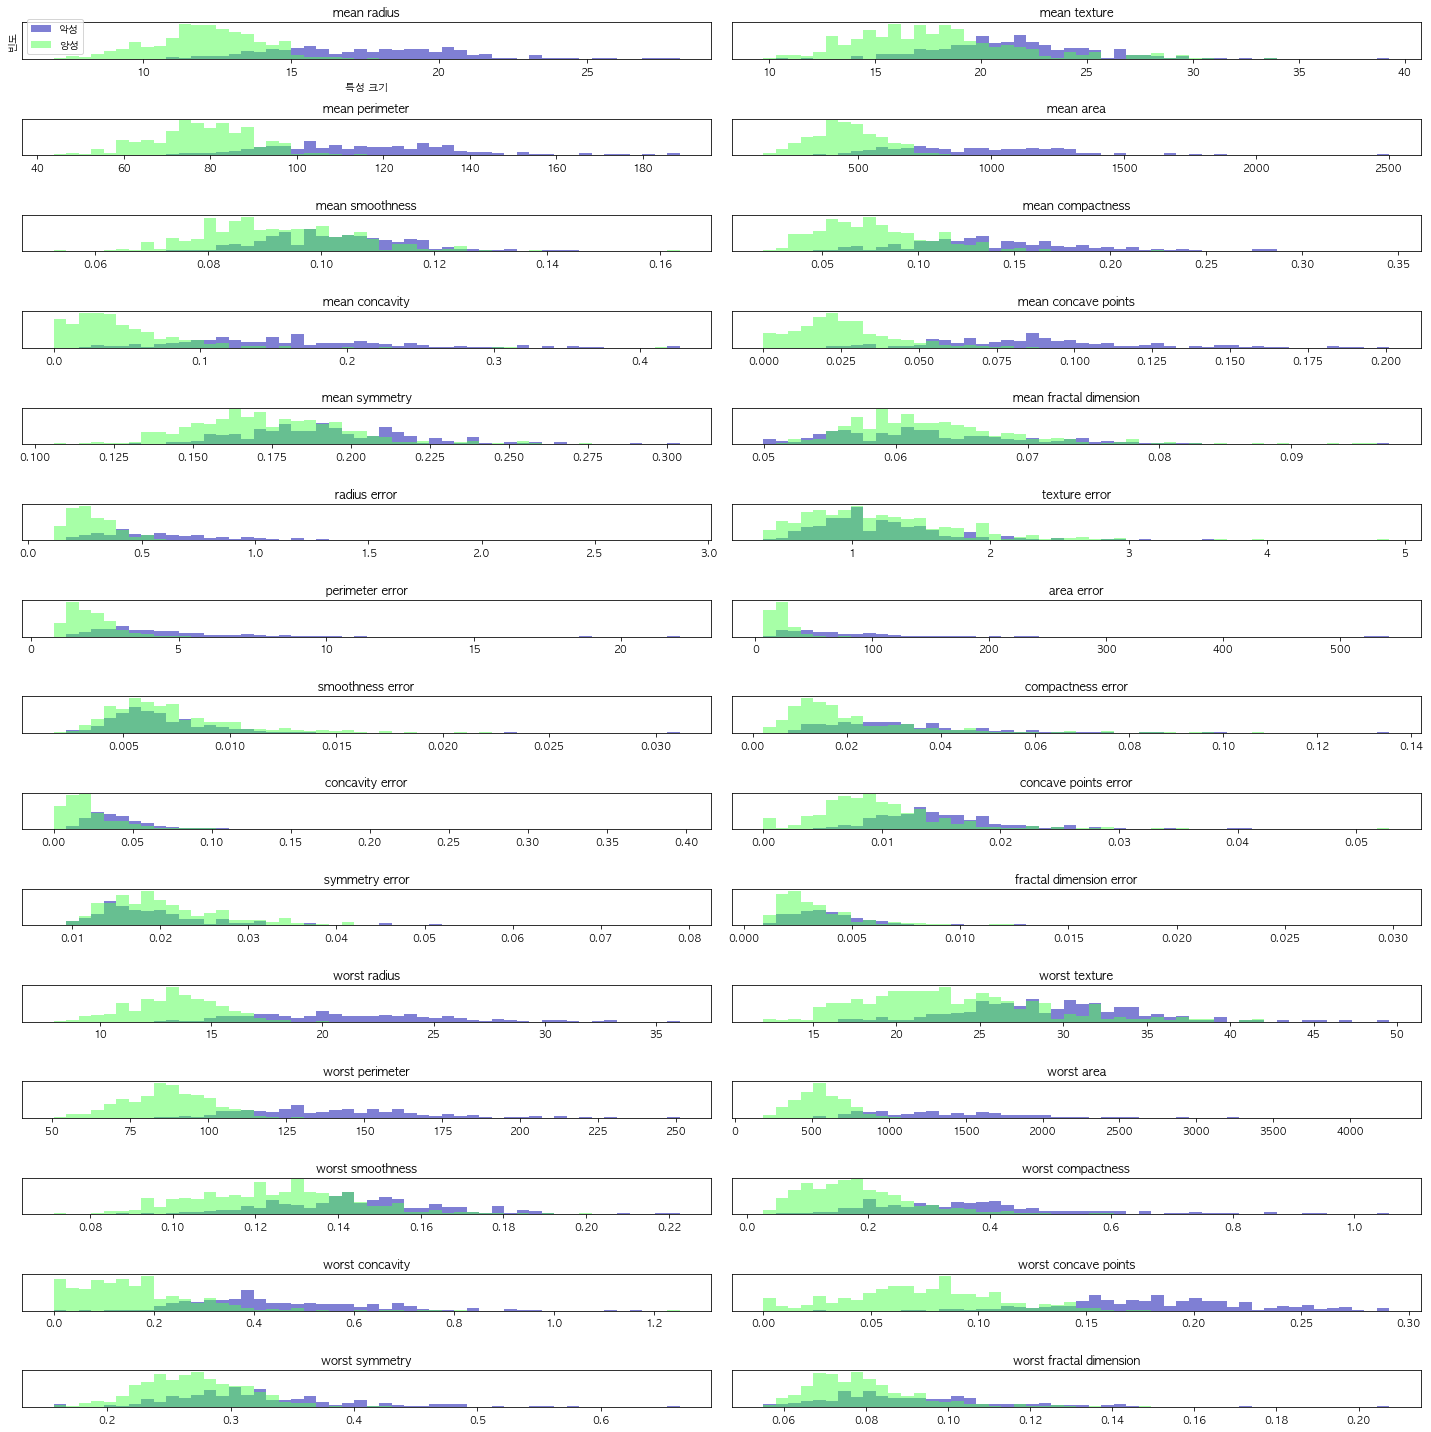

In [22]:
fig, axes = plt.subplots(15, 2, figsize=(20, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

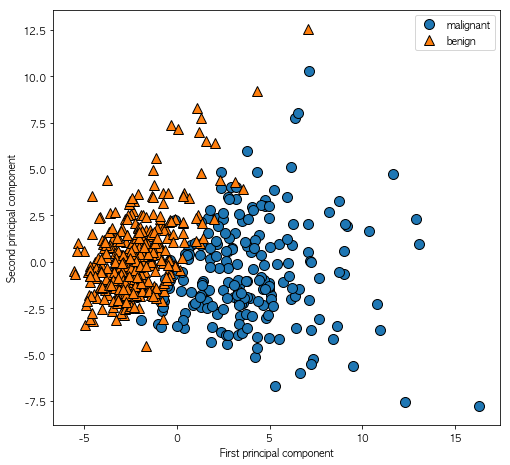

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


# plot first vs. second principal component, colored by class

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- PCA의 단점은 두 축을 해석하기가 쉽지 않는 것
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태

In [24]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

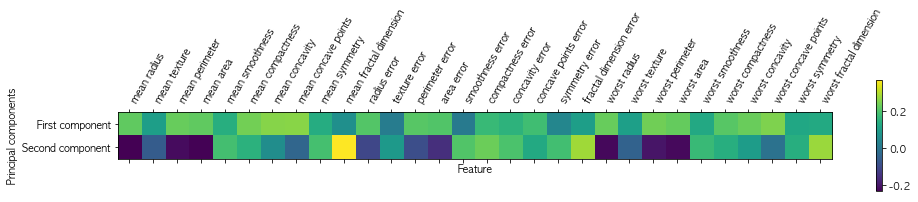

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- 첫 번째 주성분의 모든 특성은 부호가 같다(모두 양수지만, 주성분의 화살표 방향은 아무 의미가 없다..)
  - 이 말은 모든 특성 사이에 공통의 상호관계가 있다는 뜻
  - 따라서 한 특성의 값이 커지면 다른 값들도 높아지리라 전망
- 두 번쨰 주성분은 부호가 섞여 있다.
- 설명이 어려움...

#### Eigenfaces(고유얼굴) for feature extraction

PCA는 특성 추출에도 사용
- 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있다는 생각에서 출발
- 이미지를 다루는 영역에서 좋음

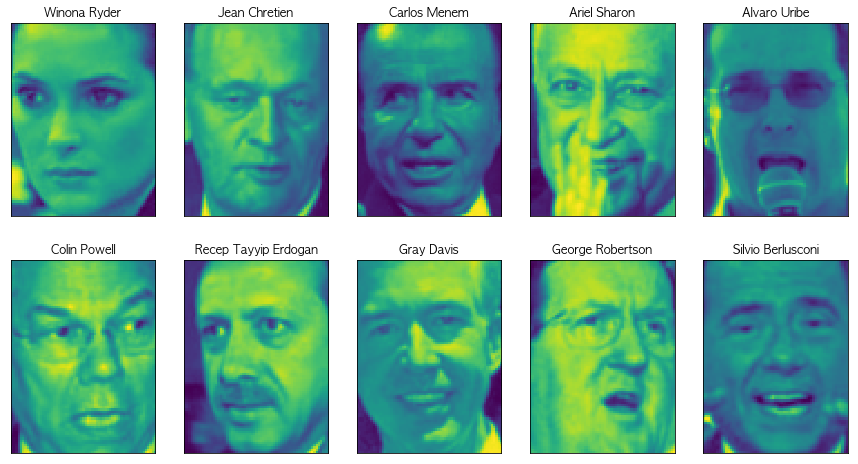

In [26]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [27]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [28]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names)) # 62명의 얼굴

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [29]:
# 각 타깃이 나타난 횟수 계산

counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

- 특정 인물들에 편중되어 있으니 사람마다 50개 이미지만 사용

In [30]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


- 정확도가 나쁜 건 아니지만...좋은 결과도 아님
- PCA를 써보자.

방법에 대해서는 작성 안함

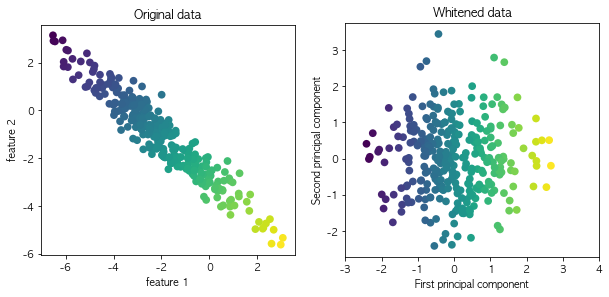

In [32]:
mglearn.plots.plot_pca_whitening()


In [33]:
# 처음 100개의 주성분 추출

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [34]:
# 추출된 데이터를 가지고 다시 KNN 이용

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [35]:
print("pca.components_.shape:", pca.components_.shape)


pca.components_.shape: (100, 5655)


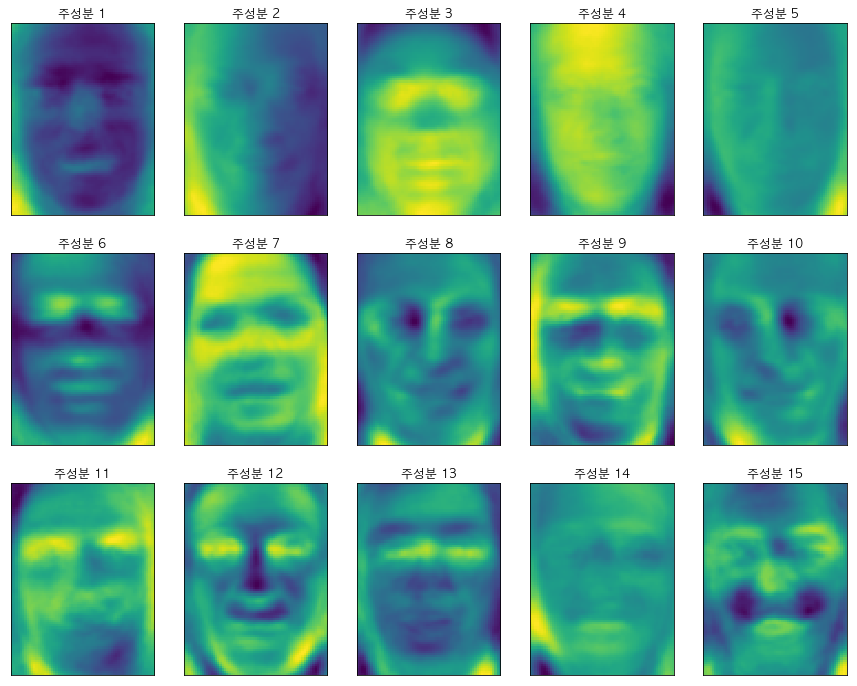

In [36]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

- 첫 번쨰 주성분은 얼굴과 배경의 명암 차이를 기록
- 두 번쨰 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것
- 그러나 사람을 판별할 때 여러 가지 요소 들이 들어가기 때문에 쉽지 않은 문제

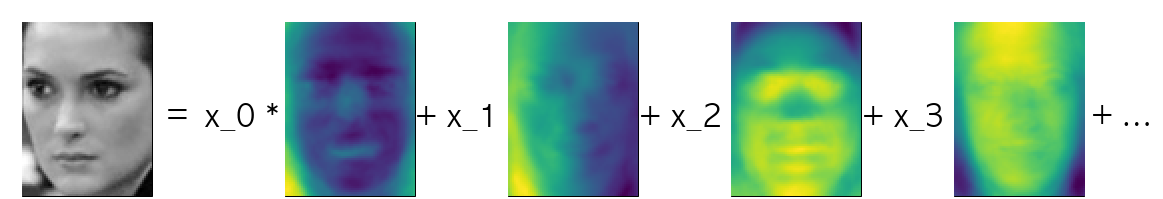

In [37]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

PCA를 이해하는 방법은 몇 개의 주성분을 사용해 원본 데이터를 재구성하는 것

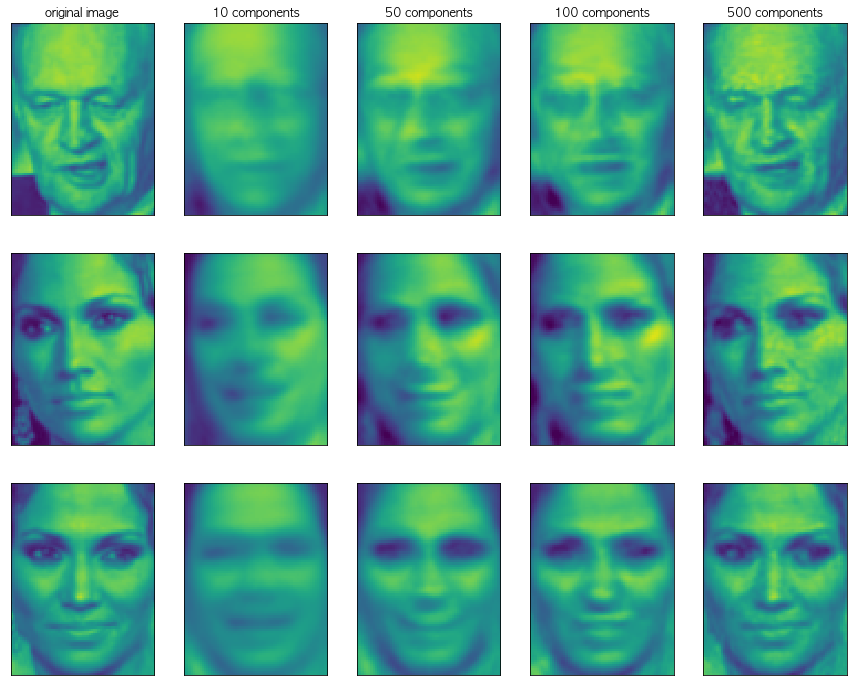

In [38]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

방법

- 몇 개의 주성분으로 데이터를 줄이고
- 원래 공간으로 되돌림, 되돌리는 작업은 inverse_transform을 사용

Text(0, 0.5, '두 번째 주성분')

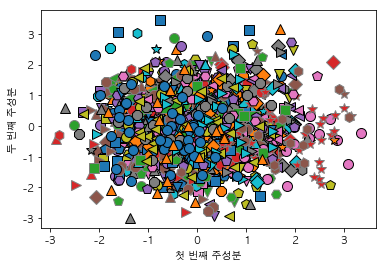

In [39]:
# 처음 두 개의 주성분을 이용하여 만든 얼굴 데이터셋의 산점도
# 많이 뭉쳐 있어서 클래스가 잘 구분되지 않음
# 위 그림에서 10개만 사용했을 때도 같은 경우임

mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

#### 3.4.2 NMF(비음수 행렬 분해)

- non-negative matrix factorization
- 유용한 특성을 뽑아내기 위한 방법
- PCA와 비슷하고 차원 축소에도 사용 가능
- PCA처럼 어떤 성분의 가중치 합으로 나타낼 수 있다.
  - PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 **NMF에서는 음수가 아닌 성분과 계수 값을 찾음**
  - 즉, 주성분과 계수가 모두 0보다 크거나 같아야 함

음수 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여 만들어진 데이터에 특히 유용
- 이럴 때 NMF는 섞여 있는 데이터에서 원본 성분 구분 가능
- eigenface는 양수와 음수 값을 모두 가지고 있지만 아무 규칙이 없음, NMF를 이용해서 살펴볼 거임

#### 인위적 데이터에 NMF 적용하기
- PCA와 다르게 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 함
- 이 말은 데이터가 원점(0, 0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻

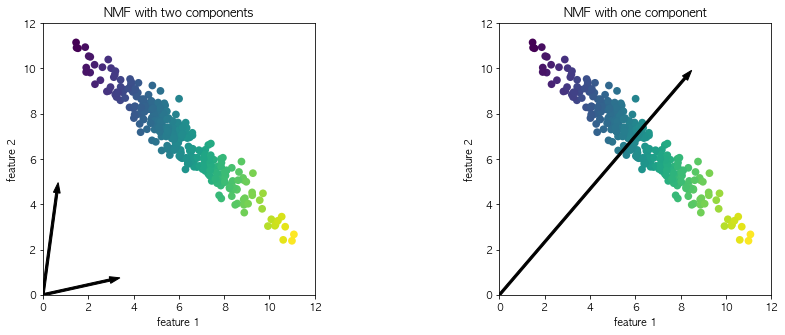

In [40]:
mglearn.plots.plot_nmf_illustration()

#### 얼굴 이미지에 NMF 적용하기

In [41]:
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

변환을 되돌린 결과는 PCA를 사용했을 때와 비슷하지만 품질이 다소 떨어짐
- PCA가 재구성 측면에서 최선의 방향을 찾기 때문
- **NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용**

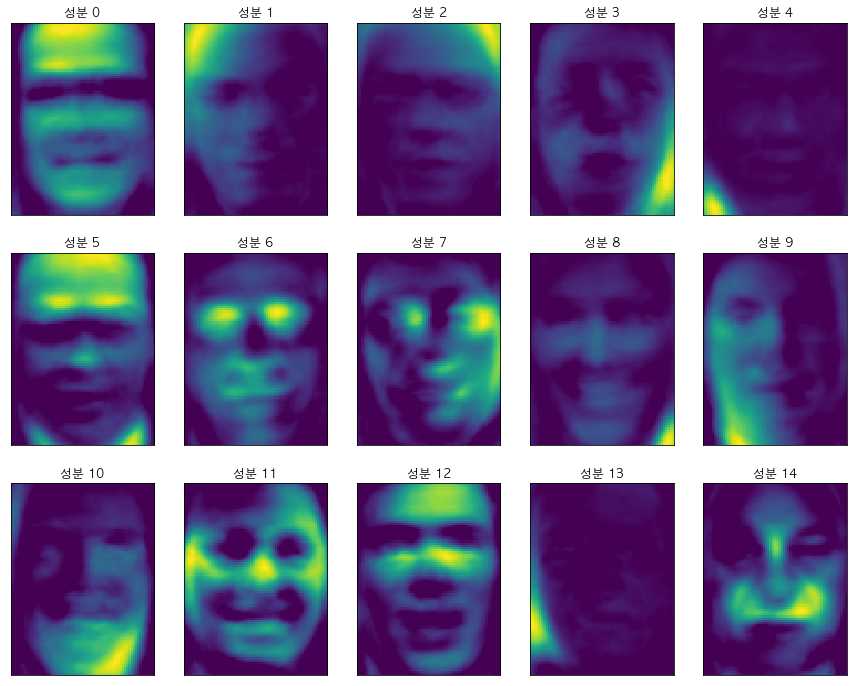

In [42]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

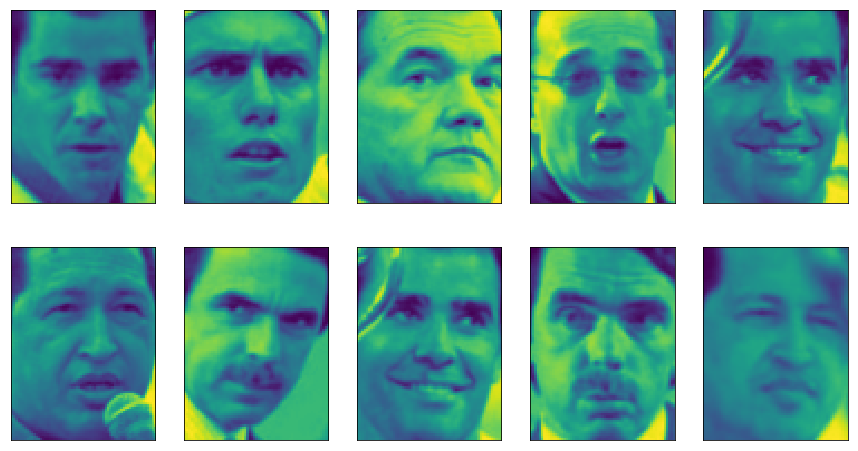

In [43]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

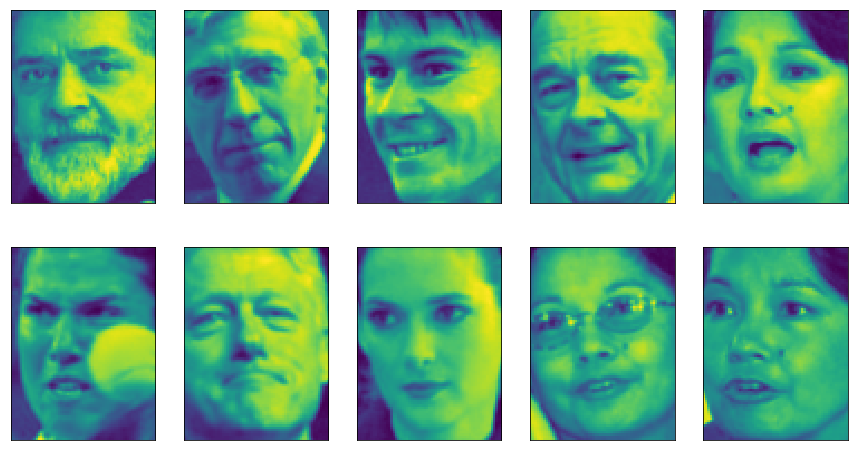

In [44]:
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- compn=3은 얼굴들이 오른쪽으로 돌아가 있다
- compn=7의 경우 왼쪽으로 돌아가 있다.
- 결국 패턴을 찾은 것

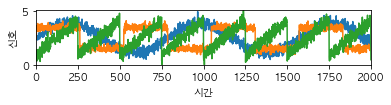

In [45]:
# 합성된 신호

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [46]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [47]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [48]:
# 비교를 위해 PCA도 적용

pca = PCA(n_components=3)
H = pca.fit_transform(X)

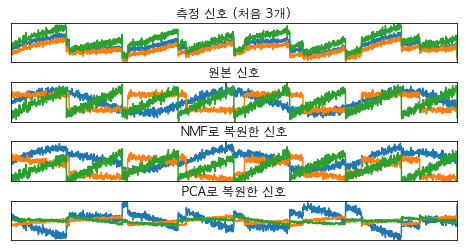

In [49]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호', 
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

패턴 추출에 관심이 있다면
- ICA : 독립 성분 분석
- FA : 요인 분석
- sparse coding : 희소 코딩

#### 3.4.3 t-SNE를 이용한 매니폴드 학습

- t-Distributed Stochastic Neighbor Embedding
- manifold learning 알고리즘은 시각화 알고리즘의 하나
- t-SNE가 많이 사용 됨

매니폴드 학습 알고리즘은 그 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없음
- t-SNE를 포함해 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못함
- 즉, 테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변환 가능
- 그래서 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 사용하지 않음

**t-SNE**
- 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
- t-SNE는 각 데이터 포인트를 2차우너에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트를 가깝게, 멀리 떨어진 포인트는 멀어지게 만듬
- t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠
  - 즉, 이웃 데이터 포인트에 대한 정보를 보존하려고 노력

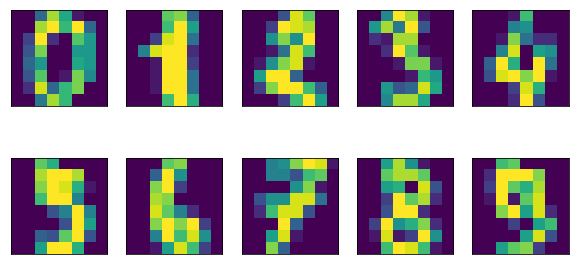

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [51]:
digits.data.shape

(1797, 64)

Text(0, 0.5, '두 번째 주성분')

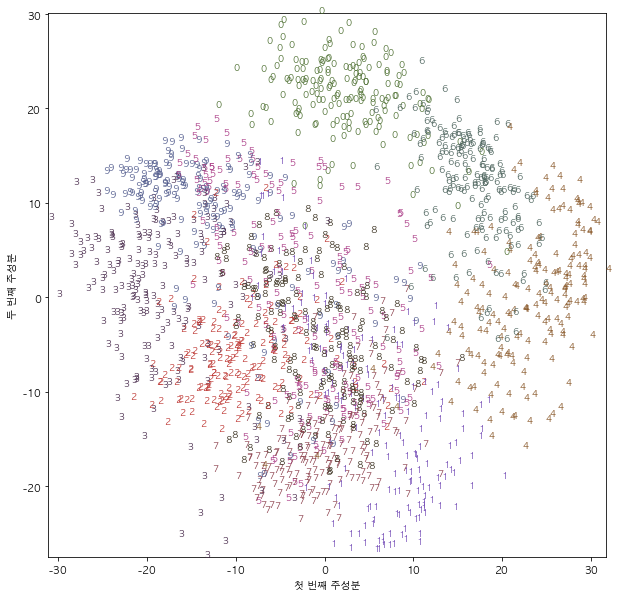

In [52]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

Text(0, 0.5, 't-SNE 특성 1')

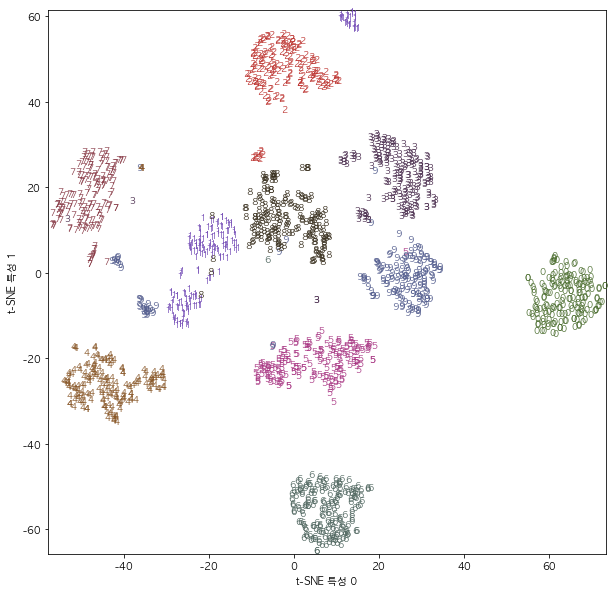

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

Text(0, 0.5, 't-SNE 특성 1')

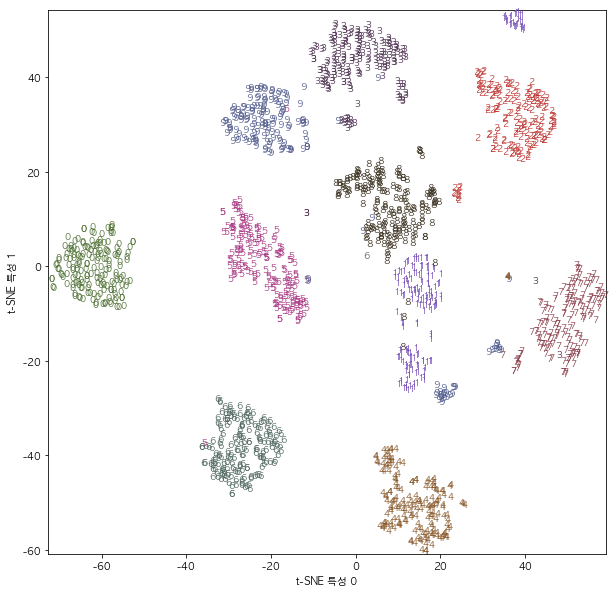

In [54]:
# random_state 제외 했을 때임.

from sklearn.manifold import TSNE
tsne = TSNE()

# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

### 3.5 Clustering(군집)

- 데이터셋을 cluster라는 그룹으로 나누는 작업
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분 되도록 데이터를 나누는 것이 목표
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측) 함

#### 3.5.1 k-means clustering
데이터의 어떤 영역을 대표하는 clustering center를 찾음
- 데이터 포인트를 가장 가까운 클러스터 중심에 할당
- 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료

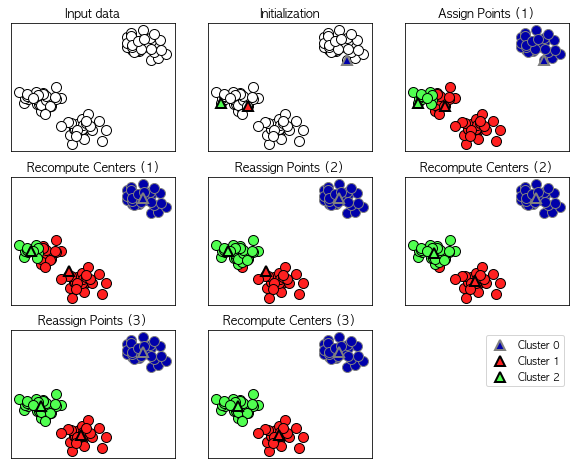

In [55]:
mglearn.plots.plot_kmeans_algorithm()

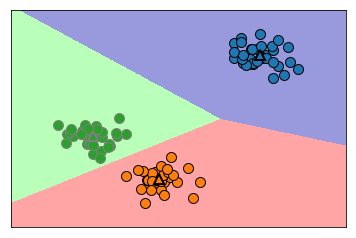

In [56]:
mglearn.plots.plot_kmeans_boundaries()

In [57]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [59]:
print(kmeans.predict(X))


[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


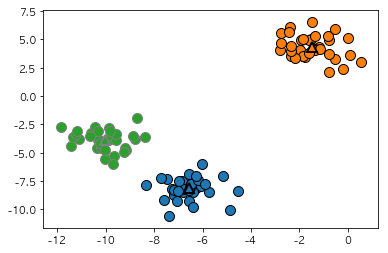

In [60]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

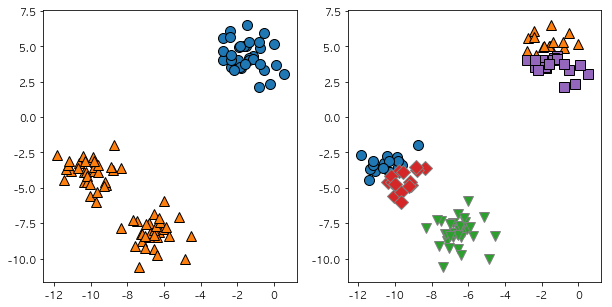

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])


#### K-means 알고리즘이 실패하는 경우
- 데이터셋의 클러스터 개수를 정확하게 알고 있더라도 항상 이를 구분해낼 수 있는 것은 아님
- 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타남
- 모든 클러스터의 반경이 똑같다는 가정이 들어가 있음
- 그래서 아래 그림과 같이 예상하지 않은 결과를 가지기도 함

Text(0, 0.5, '특성 1')

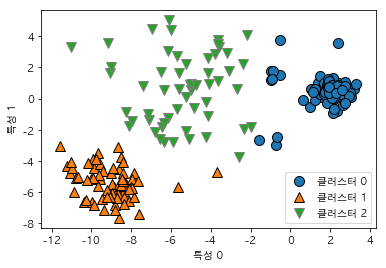

In [62]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 또한 K-means clustering은 모든 방향이 똑같이 중요하다고 가정
- 대각선으로 늘어져 있는 데이터 셋의 경우 잘 처리하지 못 함

Text(0, 0.5, '특성 1')

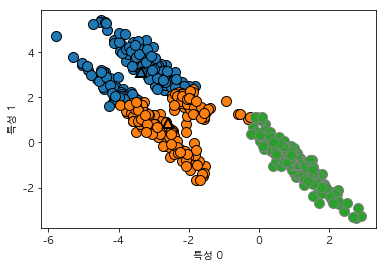

In [63]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 더 복잡한 데이터일 경우 성능이 더 안 좋아짐

Text(0, 0.5, '특성 1')

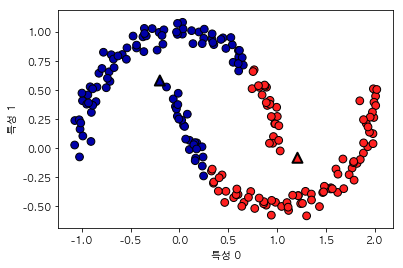

In [64]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### Vector Quantization - Or Seeing k-Means as Decomposition
- 벡터 양자화 또는 분해 메서드로서의 k-means

흥미로운 점
- PCA : 분산이 가장 큰 방향을 찾으려고 함
- NMF : 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾음
  - https://bcho.tistory.com/tag/%EB%B9%84%EC%9D%8C%EC%88%98%20%ED%96%89%EB%A0%AC%20%EC%9D%B8%EC%88%98%20%EB%B6%84%ED%95%B4
- k-means : 클러스터를 중심으로 각 데이터 포인트를 표현
  - 이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있음
  - k-means를 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 Vector Quantization(벡터 양자화)라고 함

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

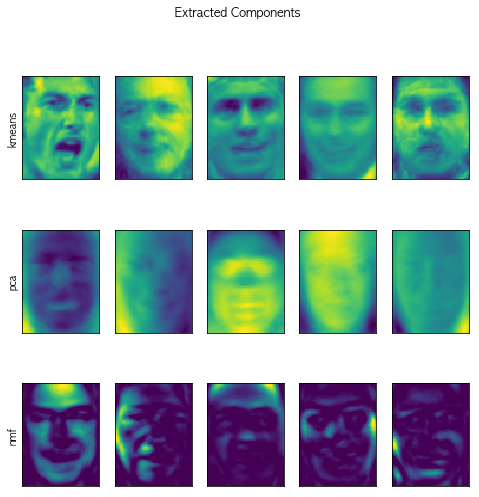

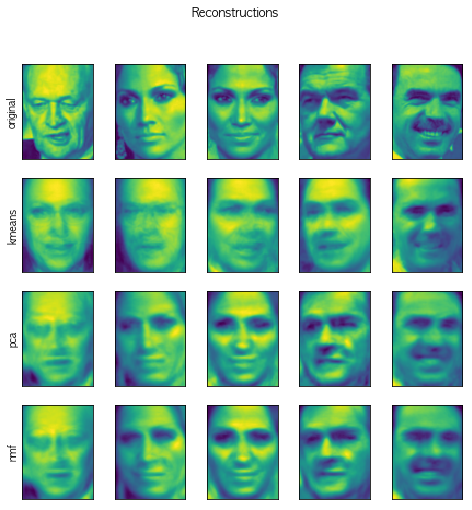

In [66]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

- 많은 클러스터를 중심으로 사용한 k-means는 데이터를 잘 표현 할 수 있음

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


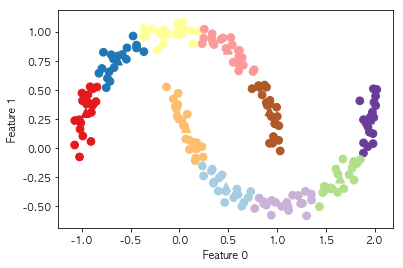

In [67]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

**K-means 정리**

장점
- 비교적 이해하기 쉽고 구현도 쉽다.
- 빠르다.
- 대용량 데이터셋에서도 잘 작동한다.
- sklearn은 아주 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKmeans도 제공
  - 알고리즘이 반복될 때 전체 데이터에서 일부를 무작위로 선택해서(미니 배치) 클러스터의 중심을 계산
  
단점
- 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라진다는 점
- 클러스터 모양을 가정하고 있어서 활용 범위가 비교적 제한적
- 찾으려 하는 클러스터의 개수를 지정해야 한다는 점

#### 3.5.2 병합 군집 - agglomerative clustering

agglomerative clustering는 다음과 원리로 만들어진 알고리즘을 뜻한다.
- agglomerative clustering은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나감
- sklearn의 종료 조건은 클러스터의 개수
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정

linkage option parameter
- ward
  - 기본값인 ward linkage는 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침
  - 그래서 크기가 비교적 비슷한 클러스터가 만들어짐
- average
  - 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침
- complete
  - 최대 연결이라고도 하며, 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

ward가 대부분의 데이터셋에 알맞기 때문에 예제에서 이 옵션을 사용
- 클러스터에 속한 포인트 수가 많이 다를 땐 average나 complete가 더 나을 수 있음

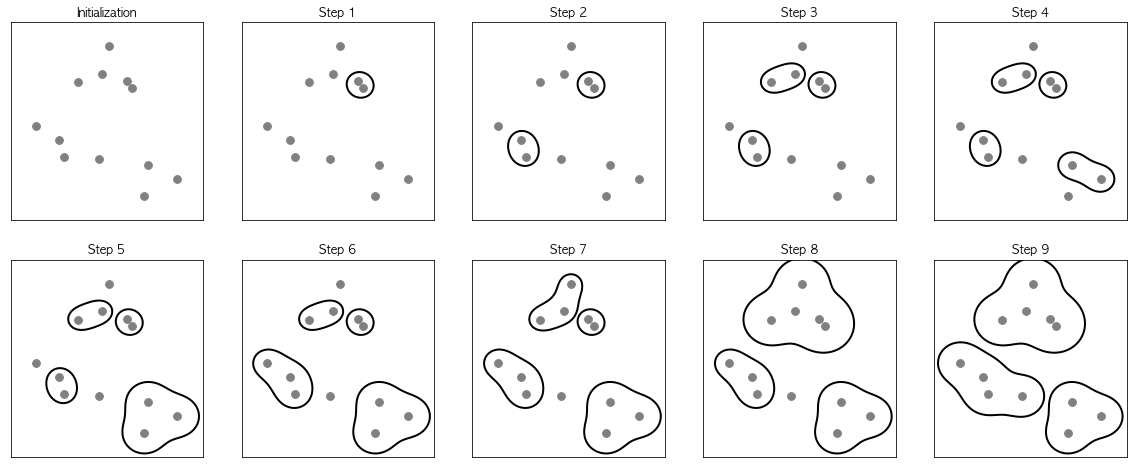

In [69]:
# agglomeratice clustering

mglearn.plots.plot_agglomerative_algorithm()

- 초기에 각 포인트가 하나의 클러스터
- 가까운 두 클러스터가 합쳐짐
- 네 번째 단계까지는 포인트가 하나뿐인 클러스터 두 개가 선택되어 합쳐짐
- 반복....
- 몇 개를 찾는지 지정했다면 그 갯수만큼만 찾고 종료

병합 군집은 예측이 없음
- 한 마디로 predict 메서드가 없음
- 대신 훈련 셋으로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 fit_predict 메서드를 사용

Text(0, 0.5, '특성 1')

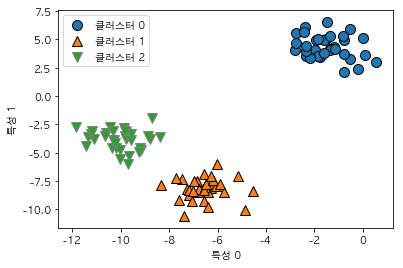

In [71]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

병합 군집 모델을 사용하려면 찾을 클러스터의 개수를 지정해야 하지만...
- 병합 군집이 적절한 개수를 선택하는 데 도움을 주기도 함

**계층적 군집과 덴드로그램(dendrograms)**

- 병합 군집은 hierarchical clustering : 계층적 군집 을 만듬
- 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동
- 아래 그림은 2차원 데이터 일 떄뿐이며 그 이상의 경우에는....

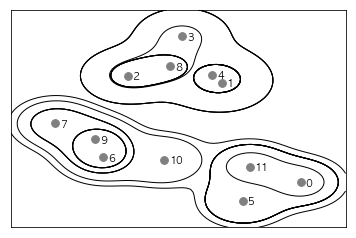

In [75]:
mglearn.plots.plot_agglomerative()

Dendrogram은 다차원 데이터 셋을 처리 할 수 있음 

Text(0, 0.5, '클러스터 거리')

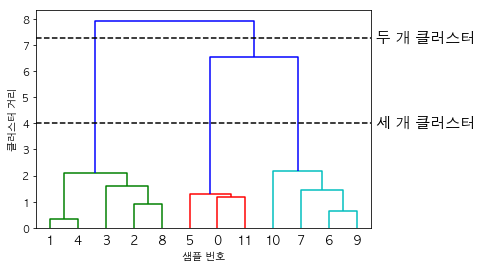

In [76]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

덴드로그램의 y 축이 단순히 병합 알고리즘에서 두 클러스터가 합쳐질 때를 나타내는 것만은 아님
- 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여줌
- 가장 긴 가지는 "세 개 클러스터"로 표시한 점선이 가로지는 세 개의 수직선임
- 가지가 가장 길다는 것은 클러스터가 세 개에서 두 개로 될 떄 꽤 먼 거리의 포인트를 모은다는 뜻

#### 3.5.3 DBSCAN - Density based spatial clustering of applications with noise

장점
- 클러스터의 개수를 미리 지정할 필요강 ㅓㅂㅅ다
- 복잡한 형상도 찾을 수 있다.
- 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.
- k-means 보다 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.

특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾음
- 이런 지역을 특성 공간의 dense region(밀집 지역)이라고 함
- **핵심 아이디어는 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것**

밀집 지역에 있는 포인트를 핵심 샘플(또는 핵심 포인트)라고 하며 다음과 같이 정의
- parameter
  - min_samples
  - eps
  - 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류
  - eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐
  
내용 보충 할 것

In [77]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블 : \n", clusters)

클러스터 레이블 : 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


- 이 예시에서는 모든 포인트에 잡음 포인트를 의믜하는 -1 레이블이 할당
- 이는 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples 기본값 떄문

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


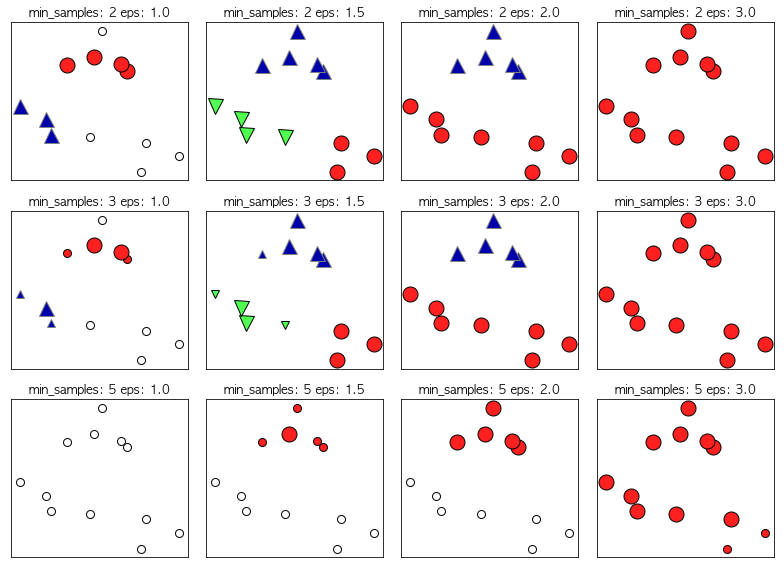

In [78]:
mglearn.plots.plot_dbscan()

클러스터에 속한 포인트는 색을 칠하고 잡음(noise) 포인트는 하얀색으로 표시, 핵심 샘플은 크게 표시하고 경계 포인트는 작게 나타냄
- eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함됨, 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듬
- min_samples를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남

eps 매개변수는 가까운 포인트의 범위를 결정하기 때문에 더 중요
- 매우 작게 하면 어떤 포인트도 핵심 포인트가 되지 못하고, 모든 포인트가 잡음 포인트가 될 수 있다.
- eps를 매우 크게 하면 모든 포인트가 단 하나의 클러스터에 속하게 됨

min_samples 설정은 덜 조밀한 지역에 있는 포인트들이 잡음 포인트가 될 것인지, 아니면 하나의 클러스터가 될 것인지를 결정하는 역할
- min_samples를 늘리면 min_samples 보다 작은 클러스터들은 잡음 포인트가 됨
- 결국 min_samples는 클러스터의 최소 크기를 결정

Text(0, 0.5, '특성 1')

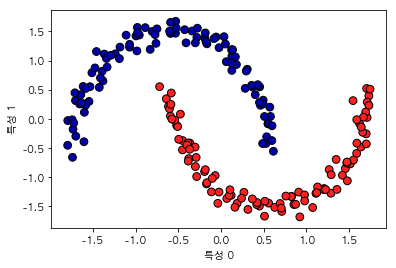

In [86]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 3.5.4 군집 알고리즘의 비교와 평가
- 군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 것

##### 타깃값으로 군집 평가하기

군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표들이 존재
- 1(최적일 때)과 0(무작위로 분류될 때) 사이의 값을 제공하는 ARI(adjusted rand index), NMI(normalized mutual information)가 가장 널리 사용하는 지표
- 아래 예시는 ARI

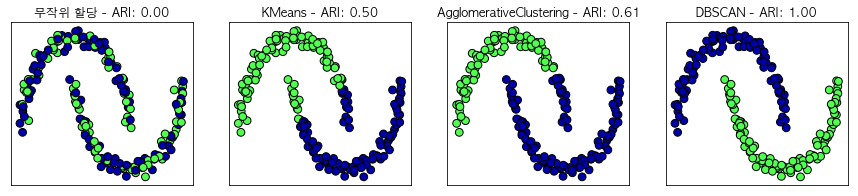

In [87]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

- 군집 모델을 평가할 때 흔히 하는 실수가 adjusted_rand_score나 normalize_mutual_info_score 같은 군집용 측정 도구를 사용하지 않고 accuracy_score를 사용하는 것...
- 클러스터 레이블은 그 자체로 의미가 있는 것이 아니라 포인트들이 같은 클러스터에 속해 있는가만이 중요

In [89]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


#### 타깃값 없이 군집 평가하기
- 사실 ARI 같은 방법에는 문제점이 있음
- 군집 알고리즘을 적용할 때 보통 그 결과와 비교할 타깃값이 없음
- ARI나 NMI 같은 지표는 애플리케이션의 성능 평가가 아니라 알고리즘을 개발할 때나 도움됨

타깃값이 필요 없는 군집용 지표로 실수엣 계수(silhouette coefficient)가 있음
- 그러나 이 지표는 실제로 잘 동작하진 않음
- 클러스터의 밀집 정도를 계산하는 것으로, 높을수록 좋으며, 최대 점수는 1
- 밀집된 크러스터가 좋긴 하지만 모양이 복잡할 때는 밀집도를 활용한 평가가 잘 들어맞지 않습니다.

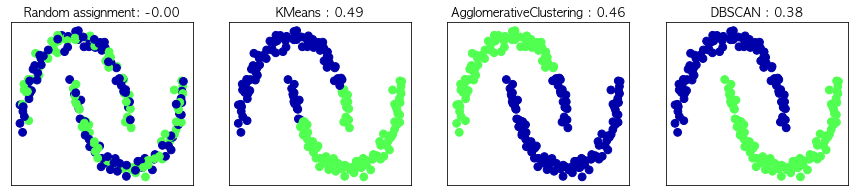

In [90]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

- ~~으앙 망....~~